# Direct Numerical Simulation (DNS) of 2D incompressible flow to observe Von-Karmaan Vortex Street

## The Governing Equations

For 2D incompressible flow, governing equations are : 

- Continuity :

\begin{equation*}
    \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} = 0
\end{equation*}


- Momentum equation in x direction :

\begin{equation*}
    \frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y} = -\frac{1}{\rho} \frac{\partial P}{\partial x} + \nu\left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)
\end{equation*}

Here, $\nu$ is kinematic viscosity


- Momentum equation in y direction : 

\begin{equation*}
    \frac{\partial v}{\partial t} + u\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial y} = -\frac{1}{\rho} \frac{\partial P}{\partial y} + \nu\left( \frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v}{\partial y^2} \right)
\end{equation*}



We can write combine the equations in Vector form as 


\begin{gather*}
    \boldsymbol{\nabla} \cdot \mathbf{u} = 0 
    \tag*{(Continuity equation)} \\
    \\
    \frac{\partial \mathbf{u}}{\partial t} + (\mathbf{u} \cdot \boldsymbol{\nabla})\mathbf{u} = - \frac{1}{\rho} \boldsymbol{\nabla} P + \nu \nabla^2 \mathbf{u} 
    \tag*{(Momentum equation)} \\
\end{gather*}


## Von Karmaan Vortex street

When a fluid flows past a cylinder/ blunt object, a repeating pattern of swirling vortices is observed. This pattern is known as  Von Karman vortex street


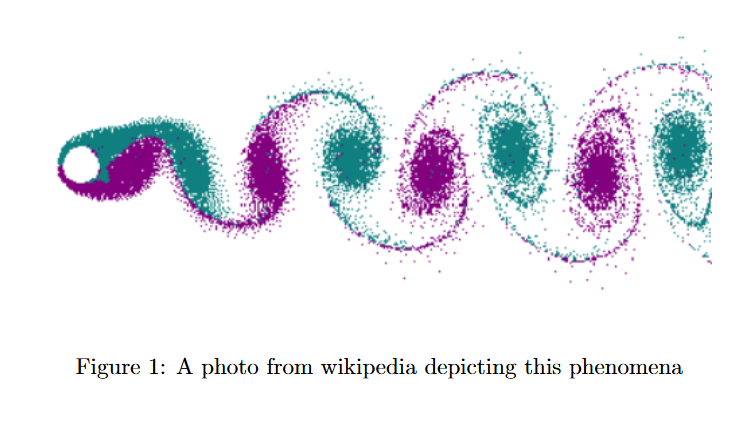


## Defining the problem domain

We are analysing a 2D incompressible flow, with fluid flowing through a rectangular section of dimensions $L_x \times L_y$. There is a cylinder (circle as cross section) placed with centre at coordinates $(\alpha L_x \;, \beta L_y)$ with circular cross-section diameter $D$. We wish to observe Von Karman Vortex street created by this cylinder.


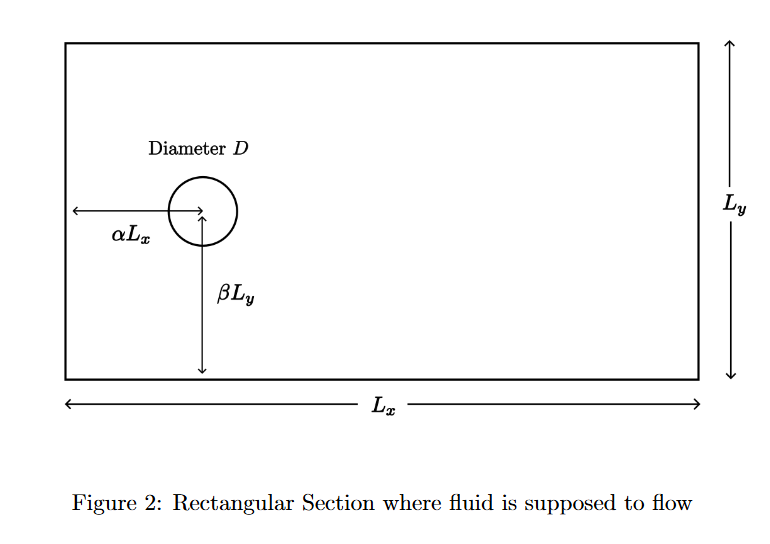


In our case, $\alpha = 1/5$, $\beta = 1/2 $, $L_x = 20D$, $L_y = 10D$


Reynolds Number of the flow near cylinder is defined as 

\begin{equation*}
    Re = \frac{UD}{\nu}
\end{equation*}



## Non-Dimensionalization

Suppose that the fluid initially travels at speed $U$ (called the free stream velocity). Then we Non-Dimensionalize $u, \; v, \; x, \; y, \; P \; \&  \; t $ by defining 


\begin{gather*}
    u^* = \frac{u}{U}  \qquad  v^* = \frac{v}{U} \\
    x^* = \frac{x}{D} \qquad  y^* = \frac{y}{D} \\
    t^* = \frac{tU}{D}  \qquad  P^* = \frac{P}{\rho U^2}\\
\end{gather*}


Notice if we choose $U=1$, $D=1$ and $\rho=1$ (all in S.I. units), we get 

\begin{gather*}
    u^* = u  \qquad  v^* = v \\
    x^* = x \qquad  y^* = y \\
    t^* = t  \qquad  P^* = P\\
\end{gather*}

Hence in this way, our original equations become non-dimensionalized and become


\begin{gather*}
    \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} = 0
    \tag*{(Continuity)} \\
    \\
    \frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y} = -\frac{\partial P}{\partial x} + \frac{1}{Re}\left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)
    \tag*{(x Momentum)} \\
    \\
    \frac{\partial v}{\partial t} + u\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial y} = -\frac{\partial P}{\partial y} + \frac{1}{Re}\left( \frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v}{\partial y^2} \right)
    \tag*{(y Momentum)} \\
\end{gather*}


Here, $Re = \frac{UD}{\nu} = \frac{1}{\nu}$

## Boundary Condition and setup


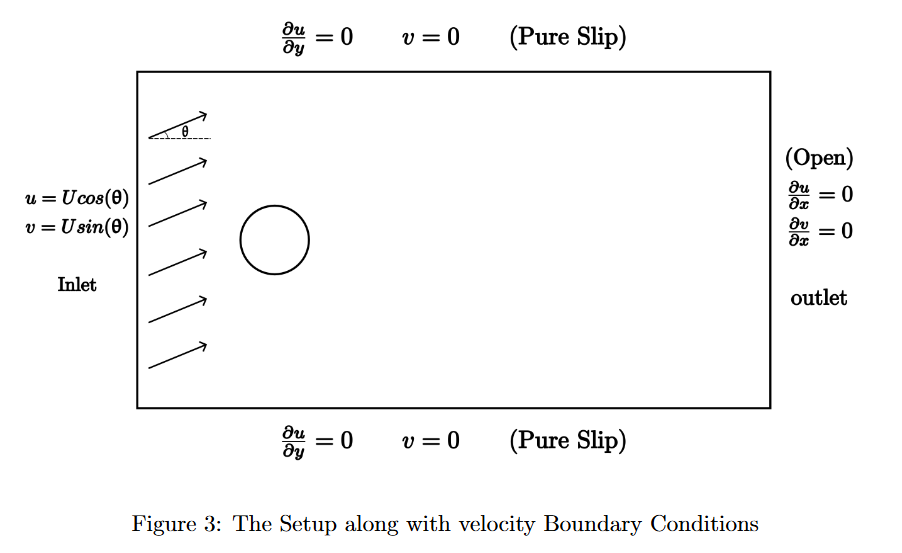


Here, we have fluid coming in at small angle $\theta$  and walls are assumed fricitonless. The outlet is open, so $u$ and $v$ doesn't change w.r.t. $x$.




## Discretization and grids

Here, we divide our domain into $N_x \times N_y$ grids

We have two types of grid, 

- Collocated Grids : Pressure $P$ and velocities $u$,$v$ are stored at centre


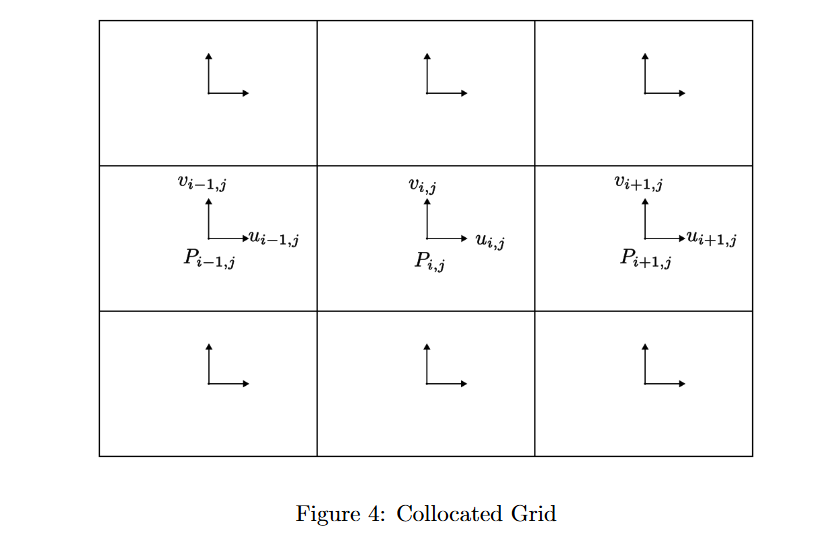


- Staggered Grids : Pressure $P$ is stored at centre, whereas velocities $u$,$v$ are stored at cell faces.

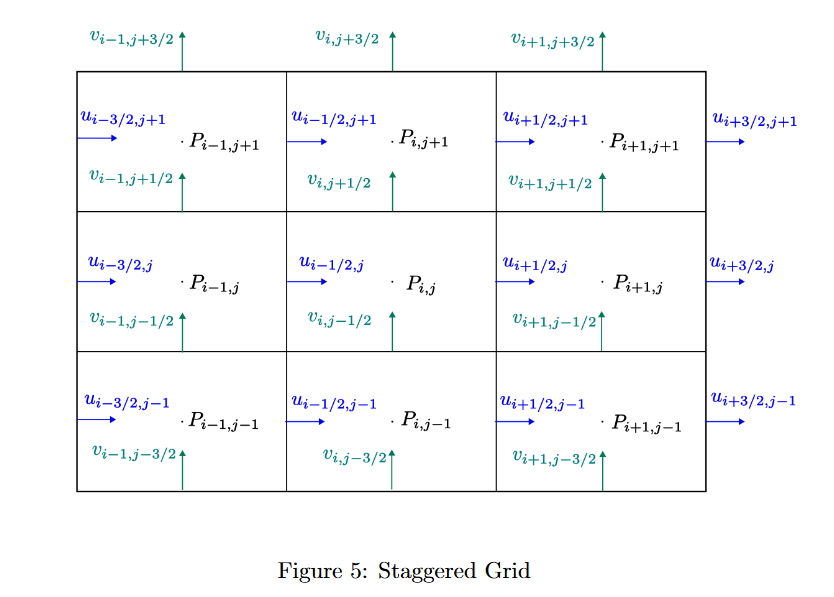


For this project, we are using Staggered Grid.




## Pressure Gradient approximation

We can approximate pressure gradient as 


\begin{equation*}
    \left.\frac{\partial P}{\partial x}\right|_{i+1/2,j} = \frac{P_{i+1,j} - P_{i,j}}{\Delta x}
    \tag*{(along x axis)}
\end{equation*}

\begin{equation*}
    \left.\frac{\partial P}{\partial y}\right|_{i,j+1/2} = \frac{P_{i,j+1} - P_{i,j}}{\Delta y}
    \tag*{(along y axis)}
\end{equation*}


## Diffusion Term approximation

We have

\begin{equation*}
    \left.\frac{\partial^2 u}{\partial x^2}\right|_{i+1/2,j} = \frac{1}{\Delta x}\left(\left.\frac{\partial u}{\partial x}\right|_{i+1,j} - \left.\frac{\partial u}{\partial x}\right|_{i,j} \right)
\end{equation*}

\begin{align*}
&\implies &&    \left.\frac{\partial^2 u}{\partial x^2}\right|_{i+1/2,j} = \frac{1}{\Delta x}\left(\frac{u_{i+3/2,j} - u_{i+1/2,j}}{\Delta x} - \frac{u_{i+1/2,j} - u_{i-1/2,j}}{\Delta x} \right) &&
\end{align*}

\begin{align*}
&\implies &&    \left.\frac{\partial^2 u}{\partial x^2}\right|_{i+1/2,j} = \frac{u_{i+3/2,j} - 2u_{i+1/2,j} + u_{i+1/2,j}}{\Delta x^2} &&
\end{align*}


and 


\begin{align*}
    \left.\frac{\partial^2 u}{\partial y^2}\right|_{i+1/2,j} = \frac{1}{\Delta y}\left(\left.\frac{\partial u}{\partial y}\right|_{i+1/2,j+1/2} - \left.\frac{\partial u}{\partial y}\right|_{i+1/2,j-1/2} \right)
\end{align*}


\begin{align*}
& \implies &&    \left.\frac{\partial^2 u}{\partial y^2}\right|_{i+1/2,j} = \frac{1}{\Delta y}\left( \frac{u_{i+1/2,j+1} - u_{i+1/2,j}}{\Delta y} - \frac{u_{i+1/2,j} - u_{i+1/2,j-1}}{\Delta y}\right) &&
\end{align*}

\begin{align*}
&\implies  &&   \left.\frac{\partial^2 u}{\partial y^2}\right|_{i+1/2,j} = \frac{u_{i+1/2,j+1} - 2u_{i+1/2,j} + u_{i+1/2,j-1}}{\Delta y^2} &&
\end{align*}

Thus, we can write


\begin{equation*}
    \left. \nabla^2u \right|_{i+1/2,j} = \left.\frac{\partial^2u}{\partial x^2}\right|_{i+1/2,j} + \left.\frac{\partial^2u}{\partial y^2}\right|_{i+1/2,j}
\end{equation*}


\begin{align*}
& \implies &&    \left. \nabla^2u \right|_{i+1/2,j} = \frac{u_{i+3/2,j} - 2u_{i+1/2,j} + u_{i+1/2,j}}{\Delta x^2} + \frac{u_{i+1/2,j+1} - 2u_{i+1/2,j} + u_{i+1/2,j-1}}{\Delta y^2} &&
\end{align*}

\begin{align}
& \implies &&    \left. \nabla^2u \right|_{i+1/2,j} = \frac{ \overset{\text{right}}{u_{i+3/2,j}}  + \overset{\text{left}}{u_{i-1/2,j}} - \overset{\text{reference}}{2u_{i+1/2,j}} }{\Delta x^2} + \frac{ \overset{\text{top}}{u_{i+1/2,j+1}}  + \overset{\text{bottom}}{u_{i+1/2,j-1}} - \overset{\text{reference}}{2u_{i+1/2,j}}} {\Delta y^2} &&
\tag{1}
\end{align}

This is known as 5 point stencil.

Similiarly, 

\begin{equation*}
    \left. \nabla^2v \right|_{i,j+1/2} = \frac{ \overset{\text{right}}{v_{i+1,j+1/2}}  + \overset{\text{left}}{v_{i-1,j+1/2}} - \overset{\text{reference}}{2v_{i,j+1/2}} } {\Delta x^2} + \frac{ \overset{\text{top}}{v_{i,j+3/2}}  + \overset{\text{bottom}}{v_{i,j-1/2}} - \overset{\text{reference}}{2v_{i,j+1/2}} }{\Delta y^2}
\end{equation*}





## Advection Term approximation

We need to compute terms 

\begin{equation*}
    u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y} \qquad \text{and} \qquad  u\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial y}
\end{equation*}

Note that 

\begin{equation*}
     \underbrace{\frac{\partial (u^2)}{\partial x} + \frac{\partial (uv)}{\partial y}}_{\text{Conservative}} = \underbrace{u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y}}_{\text{Non-conservative}}  + u(\boldsymbol{\nabla \cdot } \mathbf{u})
\end{equation*}

 Similiarly, 
 
\begin{equation*}
    \frac{\partial (v^2)}{\partial y} + \frac{\partial (uv)}{\partial x} = u\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial y} + v(\boldsymbol{\nabla \cdot } \mathbf{u})
\end{equation*}

Now in case of incompressible flow, both Conservative and Non-conservative form are same $(\because \boldsymbol{\nabla \cdot } \mathbf{u}=0)$.

Now, we approximate $ u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y}$ as 

\begin{equation*}
     \left. \left( u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y} \right) \right|_{i+1/2,j} = u_{i+1/2,j} \; \left. \frac{\partial u}{\partial x} \right|_{i+1/2,j} + v_{i+1/2,j} \; \left. \frac{\partial u}{\partial y} \right|_{i+1/2,j}
\end{equation*}

As $v_{i+1/2,j}$ isn't defined, we approximate it as 
\begin{equation*}
    v_{i+1/2,j} = \frac{v_{i,j-1/2} + v_{i,j+1/2} + v_{i+1,j-1/2} + v_{i+1,j+1/2}}{4}
    \tag*{(See Figure 5)}
\end{equation*}


Using Central difference approximation for $\frac{\partial u}{\partial x}$ and $\frac{\partial u}{\partial y}$
\begin{equation*}
    \left.\frac{\partial u}{\partial x}\right|_{i+1/2,j} \approx \frac{u_{i+3/2,j} - u_{i-1/2,j}}{2\Delta x}
    \qquad \qquad 
    \left.\frac{\partial u}{\partial y}\right|_{i+1/2,j} \approx \frac{u_{i+1/2,j+1}-u_{i+1/2,j-1}}{2\Delta y}
\end{equation*}



For Upwind approximation of $\frac{\partial u}{\partial x}$ and $\frac{\partial u}{\partial y}$, we define 

\begin{equation*}
\left. \frac{\partial u}{\partial x} \right|_{i+1/2,j} = \begin{cases}
\frac{u_{i+1/2,j} - u_{i-1/2,j}}{\Delta x}  & \text{if } u_{i+1/2,j} > 0 \\
\frac{u_{i+3/2,j} - u_{i+1/2,j}}{\Delta x}  & \text{Otherwise}  \\
\end{cases} 
\qquad \qquad
\left. \frac{\partial u}{\partial y} \right|_{i+1/2,j} = \begin{cases}
\frac{u_{i+1/2,j} - u_{i+1/2,j-1}}{\Delta y}  & \text{if } v_{i+1/2,j} > 0 \\
\frac{u_{i+1/2,j+1} - u_{i+1/2,j}}{\Delta y}  & \text{Otherwise} 
\end{cases} 
\end{equation*}


Similiarly, we approximate $u\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial y}$ as

\begin{equation*}
     \left.\left(u\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial y} \right)\right|_{i,j+1/2} = u_{i,j+1/2} \; \left. \frac{\partial v}{\partial x} \right|_{i,j+1/2} + v_{i,j+1/2} \; \left. \frac{\partial v}{\partial y} \right|_{i,j+1/2}
\end{equation*}

where 

\begin{equation*}
    u_{i,j+1/2} = \frac{u_{i-1/2,j} + u_{i-1/2,j+1} + u_{i+1/2,j} + u_{i+1/2,j+1}}{4}
    \tag*{(See Figure 5)}
\end{equation*}


Using Central difference approximation for $\frac{\partial v}{\partial x}$ and $\frac{\partial v}{\partial y}$

\begin{equation*}
    \left. \frac{\partial v}{\partial x} \right|_{i,j+1/2} \approx \frac{v_{i+1,j+1/2} - v_{i-1,j+1/2}}{2\Delta x}
    \qquad \qquad 
    \left. \frac{\partial v}{\partial y} \right|_{i,j+1/2} \approx \frac{v_{i,j+3/2}-u_{i,j-1/2}}{2\Delta y}
\end{equation*}



For Upwind approximation of $\frac{\partial v}{\partial x}$ and $\frac{\partial v}{\partial y}$, we define 

\begin{equation*}
\left. \frac{\partial v}{\partial x} \right|_{i,j+1/2} = \begin{cases}
\frac{v_{i,j+1/2} - v_{i-1,j+1/2}}{\Delta x}  & \text{if } u_{i,j+1/2} > 0 \\
\frac{v_{i+1,j+1/2} - v_{i,j+1/2}}{\Delta x}  & \text{Otherwise}  \\
\end{cases} 
\qquad \qquad
\left. \frac{\partial v}{\partial y} \right|_{i,j+1/2} = \begin{cases}
\frac{v_{i,j+1/2} - v_{i,j-1/2}}{\Delta y}  & \text{if } v_{i,j+1/2} > 0 \\
\frac{v_{i,j+3/2} - v_{i,j+1/2}}{\Delta y}  & \text{Otherwise} 
\end{cases} 
\end{equation*}


## Divergence approximation

We will need to calculate $\boldsymbol{\nabla}P$ and $\boldsymbol{\nabla \cdot u^*}$ (See Chlorin's Projection Method) . 


For Divergence of pressure, we can just write 

\begin{equation*}
     \boldsymbol{\nabla}P = \frac{\partial P}{\partial x} \boldsymbol{\hat{i}} + \frac{\partial P}{\partial y} \boldsymbol{\hat{j}}
\end{equation*}

and approximate pressure gradients $\frac{\partial P}{\partial x}$ and $\frac{\partial P}{\partial y}$ as done in above section.
 

For $\boldsymbol{\nabla \cdot u^*} = \frac{\partial u^*}{\partial x} + \frac{\partial v^*}{\partial y} $ 

We just approximate partial derivatives $\frac{\partial u^*}{\partial x}$ and $\frac{\partial v^*}{\partial y} $ using FDM. 




## Euler Update and problem with it

If we directly update the velocity $\mathbf{u}$ with time as 

\begin{equation*}
    \mathbf{u}^{n+1} = \mathbf{u}^n + \Delta t \;  \left( -\boldsymbol{\nabla} P^n+\frac{1}{Re}\textbf{Diffusion}^n - \textbf{Advection}^n  \right) 
\end{equation*}

which, by the way is 

\begin{equation*}
    \begin{bmatrix}
        u|^{n+1}_{i+1/2,j} = u|^n_{i+1/2,j}  + \Delta t \;  \left( -\left.\frac{\partial P}{\partial x}\right|_{i+1/2,j}^n+ \left.\frac{1}{Re}\text{Diffusion\_x}\right|^n_{i+1/2,j} - \left.\text{Advection\_x}\right|^n_{i+1/2,j} \right) \\ 
        v|^{n+1}_{i,j+1/2} = v|^n_{i,j+1/2}  + \Delta t \;  \left( -\left.\frac{\partial P}{\partial y}\right|_{i,j+1/2}^n+ \left.\frac{1}{Re}\text{Diffusion\_y}\right|^n_{i,j+1/2} - \left.\text{Advection\_y}\right|^n_{i,j+1/2} \right)
    \end{bmatrix}
\end{equation*}

for all $i$ and $j$.


The issue will be : it won't follow continuity equation ($\boldsymbol{\nabla \cdot }\mathbf{u} = 0$ ) as we haven't enforced that 
Also,we won't be able to get $P^{n+1}$ as we haven't updated


So, we have to update to $\mathbf{u}^{n+1}$ such that $\boldsymbol{\nabla \cdot }\mathbf{u}^{n+1} = 0$  and also simultaneously updating P.


This is done in next section (a method known as Chlorin's projection Method).

## Chlorin's Projection Method



Instead of directly updating to $\mathbf{u}^{n+1}$, we update a intermediate value $\mathbf{u}^{*}$ as 

\begin{equation}
    \mathbf{u}^{*} = \mathbf{u}^n + \Delta t \;  \left( \frac{1}{Re}\textbf{Diffusion}^n - \textbf{Advection}^n  \right)
    \tag{2}
\end{equation} 

Now, we update to $\mathbf{u}^{n+1}$ such that

\begin{equation}
    \mathbf{u}^{n+1} = \mathbf{u}^* + \Delta t \;  \left( -\boldsymbol{\nabla} P^{n+1}  \right)
    \tag{3}
\end{equation}

But this time, we update $P^{n+1}$ such that $\boldsymbol{\nabla \cdot }\mathbf{u}^{n+1} = 0$ 

Now, applying  $\boldsymbol{\nabla} \cdot$ in equation (3) gives

\begin{equation*}
    \boldsymbol{\nabla} \cdot  \mathbf{u}^{n+1} = \boldsymbol{\nabla} \cdot  \mathbf{u}^* - \Delta t \;  \left( \nabla^2 P^{n+1}  \right)
\end{equation*}

\begin{align*}
& \implies &&    0 \; = \boldsymbol{\nabla} \cdot  \mathbf{u}^* - \Delta t \;  \left( \nabla^2 P^{n+1} \right) &&
\end{align*}

\begin{align*}
& \implies &&    \Delta t \;  \left( \nabla^2 P^{n+1}  \right) = \boldsymbol{\nabla} \cdot  \mathbf{u}^*   &&
\end{align*}

\begin{align} 
& \implies &&  \nabla^2 P^{n+1}= \frac{\boldsymbol{\nabla} \cdot  \mathbf{u}^*}{\Delta t}   &&
\tag{4}
\end{align}


We solve for $P^{n+1}$ using above equation by converting it to $Ap=b$ as follows : 


For simplicity, consider simple example when $N_x=3$ and $N_y = 3$

Here pressure grid is 

\begin{equation*}
    \begin{bmatrix}
        p_{0,0} & p_{1,0} & p_{2,0} \\
        p_{0,1} & p_{1,1} & p_{2,1} \\ 
        p_{0,2} & p_{1,2} & p_{2,2}
    \end{bmatrix}
\end{equation*}


we flatten our grid and assign it to $p$ as 

\begin{equation*}
    p = \begin{bmatrix}
        p_{0,0} \\
        p_{1,0} \\
        p_{2,0} \\
        p_{0,1} \\
        p_{1,1} \\
        p_{2,1} \\ 
        p_{0,2} \\
        p_{1,2} \\
        p_{2,2}
    \end{bmatrix}
\end{equation*}

Notice that Here, A will be $9 \times 9$ matrix with coefficients calculated from equation \ref{eq:pressure_solving_eq} as 

\begin{equation*}
\nabla^2 P^{n+1}= \frac{\boldsymbol{\nabla} \cdot  \mathbf{u}^*}{\Delta t}  
\end{equation*}

Let $\frac{\boldsymbol{\nabla} \cdot  \mathbf{u}^*}{\Delta t} = b$

This becomes 

\begin{equation*}
\nabla^2 P^{n+1}= b  
\end{equation*}

Using 5-point stencil approximation for $\nabla^2P$  (See equation (1)), 

\begin{equation*}
    \left. \nabla^2P \right|_{i,j}= \frac{ \overset{\text{right}}{p_{i+1,j}}  + \overset{\text{left}}{p_{i-1,j}} - \overset{\text{reference}}{2p_{i,j}} } {\Delta x^2} + \frac{ \overset{\text{down}}{p_{i,j+1}}  + \overset{\text{top}}{p_{i,j-1}} - \overset{\text{reference}}{2p_{i,j}} }{\Delta y^2}
\end{equation*}

it becomes 

\begin{equation*}
    \frac{1}{\Delta x^2}p_{i+1,j} + \frac{1}{\Delta x^2}p_{i-1,j} + -2(\frac{1}{\Delta x^2} + \frac{1}{\Delta y^2})p_{i,j} + \frac{1}{\Delta y^2}p_{i,j+1} + \frac{1}{\Delta y^2}p_{i,j-1} = b_{i,j}
\end{equation*}

or 

\begin{equation*}
    R\;p_{i+1,j} + L\;p_{i-1,j} + C\;p_{i,j} + D\;p_{i,j+1} + U\; p_{i,j-1} = b_{i,j}
\end{equation*}

where $R,L,C,D.U$ are coefficients.

for $i=1 , j=1$, it becomes

\begin{equation*}
    R\;p_{2,1} + L\;p_{0,1} + C\;p_{1,1} + D\;p_{1,2} + U\; p_{1,0} = b_{1,1}
\end{equation*}

which in a matrix form, looks like 

\begin{equation*}
    \begin{bmatrix}
    & & & &  & & & &  \\
    \vdots & \vdots & \cdots  & &  &  &  \cdots & \vdots & \vdots  \\
    \vdots & \vdots & \cdots  & &  &  &  \cdots & \vdots & \vdots  \\
    0  & U & 0 & L & C & R & 0 & D & 0\\
    \vdots & \vdots & \cdots  & &  &  &  \cdots & \vdots & \vdots  \\
    \vdots & \vdots & \cdots  & &  &  &  \cdots & \vdots & \vdots  \\
    & & & & & & & &  \\
    
        
    \end{bmatrix} 
    \begin{bmatrix}
        p_{0,0} \\
        p_{1,0} \\
        p_{2,0} \\
        p_{0,1} \\
        p_{1,1} \\
        p_{2,1} \\ 
        p_{0,2} \\
        p_{1,2} \\
        p_{2,2}
    \end{bmatrix}
    =
    \begin{bmatrix}
        b_{0,0} \\
        b_{1,0} \\
        b_{2,0} \\
        b_{0,1} \\
        b_{1,1} \\
        b_{2,1} \\ 
        b_{0,2} \\
        b_{1,2} \\
        b_{2,2}
    \end{bmatrix}
\end{equation*}


Now, we enforce Boundary conditions, say Neumann B.C. at $x=0$ ($\frac{\partial p}{\partial x} = 0 \text{ at } x=0$) i.e. 

\begin{equation*}
    p_{0,j} = p_{-1,j}
\end{equation*}

Now again expanding $\nabla^2 P^{n+1}= b$ at $i=0,j=1$, we get

\begin{equation*}
    \frac{1}{\Delta x^2}p_{1,1} + \frac{1}{\Delta x^2}p_{-1,1} + -2(\frac{1}{\Delta x^2} + \frac{1}{\Delta y^2})p_{0,1} + \frac{1}{\Delta y^2}p_{0,2} + \frac{1}{\Delta y^2}p_{0,0} = b_{i,j}
\end{equation*}

\begin{align*}
& \implies &&    \frac{1}{\Delta x^2}p_{1,1} + \frac{1}{\Delta x^2}p_{0,1} + -2(\frac{1}{\Delta x^2} + \frac{1}{\Delta y^2})p_{0,1} + \frac{1}{\Delta y^2}p_{0,2} + \frac{1}{\Delta y^2}p_{0,0} = b_{i,j} &&
\end{align*}

\begin{align*}
& \implies &&    \frac{1}{\Delta x^2}p_{1,1} + \left( \frac{1}{\Delta x^2} + -2(\frac{1}{\Delta x^2} + \frac{1}{\Delta y^2}) \right)p_{0,1} + \frac{1}{\Delta y^2}p_{0,2} + \frac{1}{\Delta y^2}p_{0,0} = b_{i,j} &&
\end{align*}

Notice that this becomes 

\begin{align*}
& \implies &&    R\; p_{1,1} + \left( L+C \right)\; p_{0,1} + D\; p_{0,2} + U\;p_{0,0} = b_{0,1} &&
\end{align*}

Notice that incase of $\frac{\partial p}{\partial x} = 0 \text{ at } x=0$, we add Left  coefficient L to Centre C

Simliarly, for $\frac{\partial p}{\partial y} = 0 \text{ at } y=0$, we add Down coefficient D to Centre C


and so on. 

Now, with that our matrix becomes (showing terms only for $(i=1,j=1)$ and $(i=0,j=1)$) 


\begin{equation*}
    \begin{bmatrix}
    & \cdots & & \cdots & & \cdots & &  \cdots &  \\
    \vdots & \vdots & \cdots  & &  &  &  \cdots & \vdots & \vdots  \\
    U  & 0 & 0 & L+C & R & 0 & D & 0 & 0 \\
    0  & U & 0 & L & C & R & 0 & D & 0 \\
    \vdots & \vdots & \cdots  & &  &  &  \cdots & \vdots & \vdots  \\
    \vdots & \vdots & \cdots  & &  &  &  \cdots & \vdots & \vdots  \\
    & & & & & & & &  \\
    
        
    \end{bmatrix} 
    \begin{bmatrix}
        p_{0,0} \\
        p_{1,0} \\
        p_{2,0} \\
        p_{0,1} \\
        p_{1,1} \\
        p_{2,1} \\ 
        p_{0,2} \\
        p_{1,2} \\
        p_{2,2}
    \end{bmatrix}
    =
    \begin{bmatrix}
        b_{0,0} \\
        b_{1,0} \\
        b_{2,0} \\
        b_{0,1} \\
        b_{1,1} \\
        b_{2,1} \\ 
        b_{0,2} \\
        b_{1,2} \\
        b_{2,2}
    \end{bmatrix}
\end{equation*}



Hence, we can write this as 

\begin{equation}
    Ap = b
    \tag{5}
\end{equation}

We first initialize $A$ and store it. Since $b$ changes with time, we solve for $p$ each time using SciPy's Linalg solver.




We implement this method in following order 
\begin{equation*}
   \text{Initialization step (equation (2))} \rightarrow \text{Pressure solving step (equation (5))} \rightarrow \text{Correction step (equation (3))}
\end{equation*}



## Boundary Conditions on Pressure

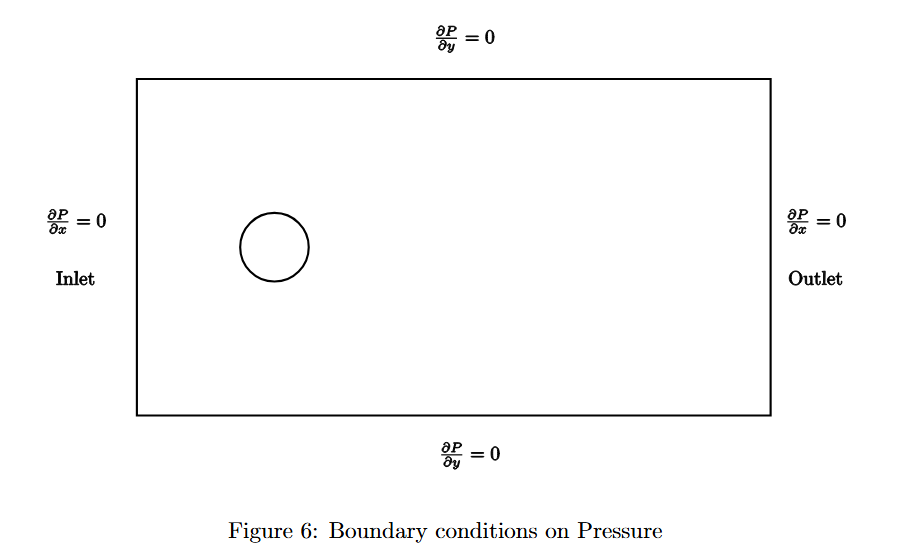

The boundary conditions applied here can be combined written as $\frac{\partial P}{\partial \eta } = 0$ where $\eta$ is normal vector.

This Neumann Boundary condition at all walls means that section of fluid near boundaries isn't influenced by pressure difference there, and are driven by momentum boundary condition.

Also, to avoid solving issues, we set pressure for a single point $p_{0,0} = 0$ 


## Immersed Boundary Method (IBM)

This method helps to add objects to our grid, without changing the grid itself. It works by defining the boundary points of object, then at those points, adding the force experienced at that point. In this way, the boundary isolates the inside of object from outside .


### 1. Defining Boundary Points for our object Cylinder

The Object we need is Disk, So we define it's boundary in $N_b$  points, with their coordinates as

\begin{equation*}
    \begin{pmatrix} 
    X_k \\ 
    Y_k 
    \end{pmatrix}
= 
\begin{pmatrix}
C_x + R cos(\theta_k) \\
C_y + R sin(\theta_k) 
\end{pmatrix}
\end{equation*}

Where 

- $(C_x,C_y)$ is centre of our object disk 
- $R$ is radius of disk 
- $\theta_k = \frac{2\pi}{N_b} k$, $k=0,1,2,...,N_b-1$


### 2. Interpolating velocity at boundary points

Now that we have defined the boundary points, we interpolate velocity at these points to calculate force exerted on these points

We use bilinear interpolation for this case, 


So for each point $(X_k,Y_k)$, we interpolate velocity as follows :


#### u component : 



**a)** We find numerical indices for $(X_k,Y_k)$ as $i' = \frac{X_k - X_{start}}{dx}$  and $j' = \frac{Y_k - Y_{start}}{dy}$

For u velocity, $X_{start} = 0$ and $Y_{start}=dy/2$



**b)**  Index of nearest down-left u component velocity point is $i=\lfloor i' \rfloor$ and $j= \lfloor j' \rfloor$



**c)** we define weights $w_x$ and $w_y$ as
$w_x = i' - i$ and $w_y = j' - j$

Notice if $i'=i, w_x = 0$ and if $i'=i+1,w_x=1$
That means weight for index i $w_i$ will be $1-w_x$ and for index i+1, $w_{i+1} = w_x$

Similarly, weights for index $j$ and $j+1$ can be written as $w_j = 1-w_y$ and $w_{j+1} = w_y$ 

Now, Weight for point $i,j$ or $w_{ij}$ and weights for other points $w_{i+1,j}$, $w_{i,j+1}$ and $w_{i+1,j+1}$ are given as 

\begin{gather*}
w_{ij} = w_i w_j = (1-w_x)(1-w_y)\\
w_{i+1,j} = w_{i+1} w_j = w_x (1-w_y) \\
w_{i,j+1} = w_i w_{j+1} = (1-w_x)w_y\\
w_{i+1,j+1} = w_{i+1} w_{j+1} = w_x w_y
\end{gather*}



**d)** Finally, we interpolate velocity by using weighted sum as

\begin{equation*}
u_k = w_{i,j} u_{i,j} + w_{i+1,j} u_{i+1,j} + w_{i,j+1} u_{i,j+1} + w_{i+1,j+1} u_{i+1,j+1} 
\end{equation*}

**NOTE :** Here, i,j are code indices and not math indices ( the one notation we used for staggered grid)

This is done for all $k=0,1,2,...,N_b-1$


#### v component : 

We repeat the same for $v$ component $v_k$.



### 3. Calculating force at boundary points


At point $(X_k,Y_k)$, we calculate body forces $(F_{k})_x = \rho (f_{k})_x$ and 
$(F_{k})_y = \rho (f_{k})_y$ 

For $\rho = 1$, $(F_{k})_x = (f_{k})_x$ and $(F_{k})_y = (f_{k})_y$ i.e. body forces equals accelerations $(f_k)_x$ and $(f_k)_y$ 

Where, these acceleration are given by

\begin{equation*}
(f_k)_x = \frac{u_{target} - u_{k}}{\Delta t} 
\qquad
(f_k)_y = \frac{v_{target} - v_{k}}{\Delta t} 
\end{equation*}
for all $k=0,1,2,....,N_b-1$

Here, $u_{target}$ and $v_{target}$ are zero as cylinder is stationary and non-rotating.

In code, we use relaxation factor $\alpha$ as 

\begin{equation*}
(f_k)_x = \alpha \frac{(u_{target} - u_{k})}{\Delta t} 
\qquad
(f_k)_y = \alpha \frac{(v_{target} - v_{k})}{\Delta t} 
\end{equation*}

This is done so as to prevent from applying excessive forces which might be due to interpolation error. We chose $\alpha = 0.8$ in our case.

### Spreading Force across the grid

In this final step, we distribute this force across the grid 

In general Immersed Boundary methods, delta dirac function $\delta (X)$ is used to spread this force as

\begin{equation*}
f(\mathbf{X})_x = \sum_k  (f_k)_x \ \delta(\mathbf{X-X_k})
\end{equation*} 

\begin{equation*}
f(\mathbf{X})_y = \sum_k  (f_k)_y  \ \delta(\mathbf{X-X_k})
\end{equation*} 

where $\mathbf{X}= \begin{pmatrix} x \\ y \end{pmatrix}$

Here, however we again use bilinear interpolation for this work

i.e., we spread the force as 


\begin{equation*}
f(\mathbf{X})_x = \sum_k  (f_k)_x \ h(\mathbf{X,X_k})
\end{equation*}

\begin{equation*}
f(\mathbf{X})_y = \sum_k  (f_k)_y \ h(\mathbf{X,X_k})
\end{equation*}

Where 

\begin{equation*}
h(\mathbf{X,X_k}) = 
\begin{cases}
\ w_i w_j \ , & \text{if}  \ 0 < X_k - X < dx \quad \& \quad 0 < Y_k - Y < dy \\[1em]
\ w_{i+1} w_j \ , & \text{if} \  -dx < X_k - X < 0 \quad \& \quad 0 < Y_k - Y < dy \\[1em]
\ w_i w_{j+1} \ , & \text{if} \  0 < X_k - X < dx  \quad \& \quad -dy < Y_k - Y < 0 \\[1em]
\ w_{i+1} w_{j+1} \ , & \text{if} \  -dx < X_k - X < 0  \quad \& \quad -dy < Y_k - Y < 0 \\[1em]
\ 0 \ ,  & \text{Otherwise} 
\end{cases}
\end{equation*}

Note that $\mathbf{X_k} = \begin{pmatrix} X_k \\ Y_k\end{pmatrix}$ and $\mathbf{X} = \begin{pmatrix} X \\ Y\end{pmatrix}$



Finally, this body force is added to momentum equations as 

\begin{equation*}
    \frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y} = -\frac{\partial P}{\partial x} + \frac{1}{Re}\left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right) + \rho f_x
\end{equation*}

\begin{equation*}
    \frac{\partial v}{\partial t} + u\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial y} = -\frac{\partial P}{\partial y} + \frac{1}{Re}\left( \frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v}{\partial y^2} \right) + \rho f_y
\end{equation*}

Here. $\rho=1$

## Stability Conditions in solving 2D Navier stokes

Using Von Neumann Stability Analysis, we can show following stability conditions

We get diffusion stability condition as

\begin{equation*}
\Delta t \le \frac{1}{2\nu( \frac{1}{\Delta x^2} + \frac{1}{\Delta y^2})}
\end{equation*}

Using $\Delta x = \Delta y = h$ and $\nu = \frac{1}{Re}$ 

\begin{equation*}
\Delta t \le \frac{Re \; h^2}{4}
\end{equation*}

And Similiarly, we get advection stability condition as

\begin{equation*}
\Delta t \le \frac{h}{2max(u,v)}
\end{equation*}


Combining all, We get

\begin{equation*}
\Delta t \le \text{min}( \frac{Re \ h^2}{4}, \frac{h}{2max(u,v)} )
\end{equation*}


In our case, $Re=200$, $U_{\infty}=1$, $max(u,v) = 10 \ U_{\infty} = 10$ (Worst case), $h=20/384 \approx 0.052$ 


Hence, 

\begin{equation*}
\Delta t \le \text{min}( \frac{200× (0.052)^2}{4}, \frac{0.052}{2 \times 10} )
\end{equation*}

\begin{equation*}
\Delta t \le \text{min}(0.1352, 0.0026)
\end{equation*}

\begin{equation*}
\Delta t \le 0.0026
\end{equation*}


We chose $\Delta t = 0.001$ to be safe and to also capture vortex shedding smoothly


## Results

Our simulation created a 30 real-time seconds vorticity video ( simulation time also 30s). 

Here are snapshots of vorticity frames as well as velocity contour frames. 


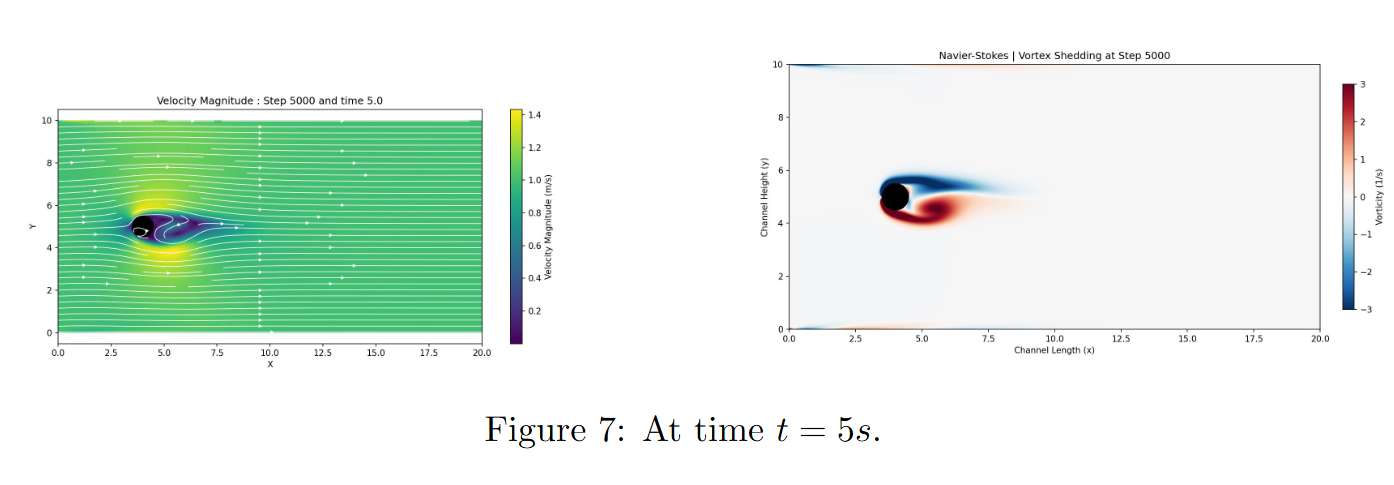

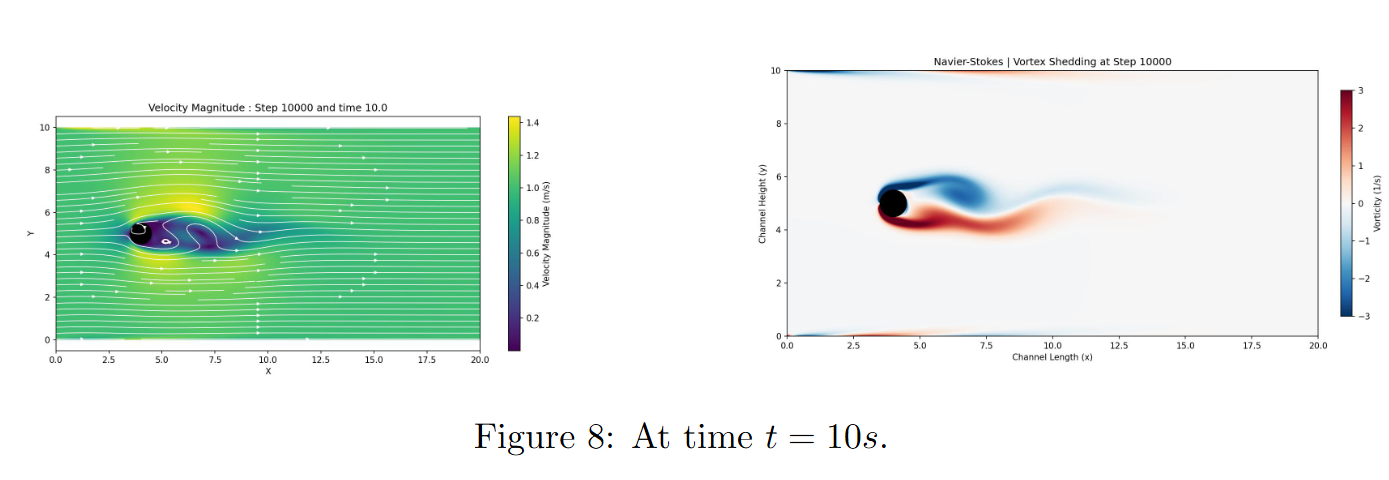

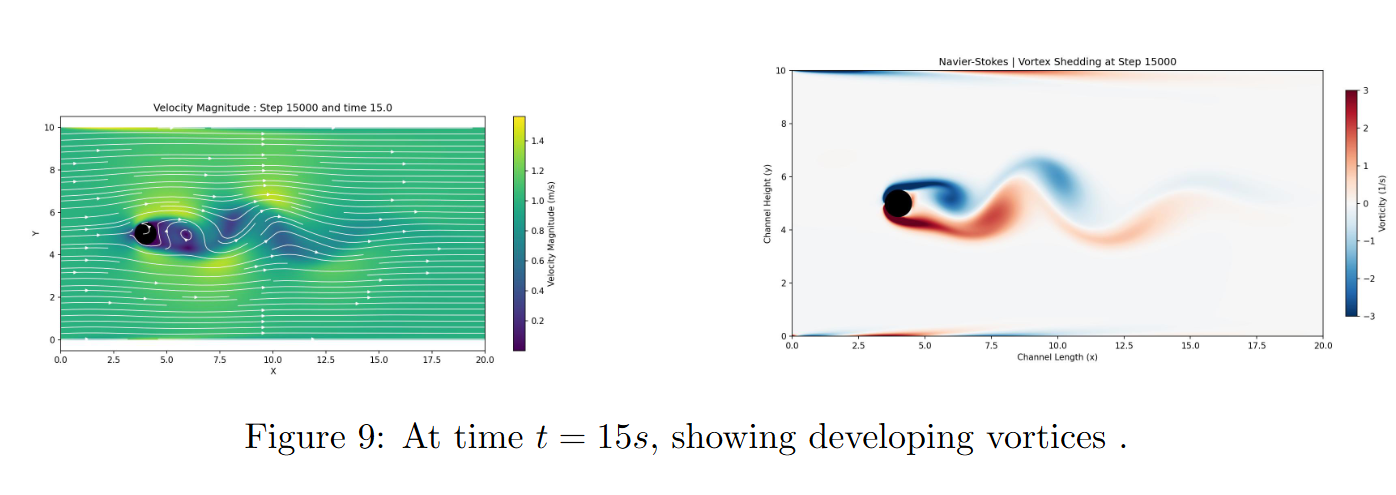

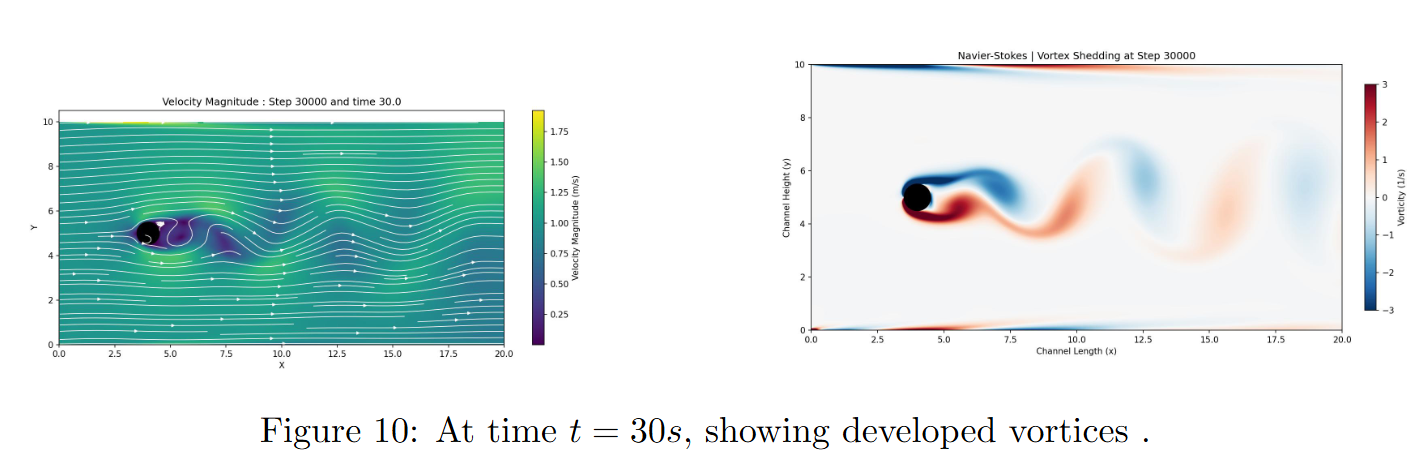




We define Drag force $f_{drag}$ as net horizontal force exerted by fluid flow ($f_{drag} = \sum f_x$) 
 and Lift force as net vertical force exerted by fluid flow ($f_{lift} = \sum f_y$) 



Similarly, we define Lift coefficient ($C_l$) and Drag coefficient as ($C_d$) as


\begin{equation*}
C_l = \frac{f_{lift}}{1/2 \rho U_{\infty}^2} 
\qquad 
C_d = \frac{f_{drag}}{1/2 \rho U_{\infty}^2} 
\end{equation*}


As $\rho=1$ \& $U_{\infty}=1$, we get
 
\begin{equation*}
C_l = 2 f_{lift}
\qquad 
C_d = 2 f_{drag}
\end{equation*}

Now, we define Strouhal Number $St$  ( A dimensionless number that describes oscillation flow quantitatively, High Strouhal Number means more unsteady and oscillating flow)

\begin{equation*}
St = \frac{f \ D}{U_{\infty}}
\end{equation*}

Where $f$ is vortex shedding freuqncy

Now, if we plot $C_l$ vs. $t$ Graph, we must get oscillating lift due to swirling vortices


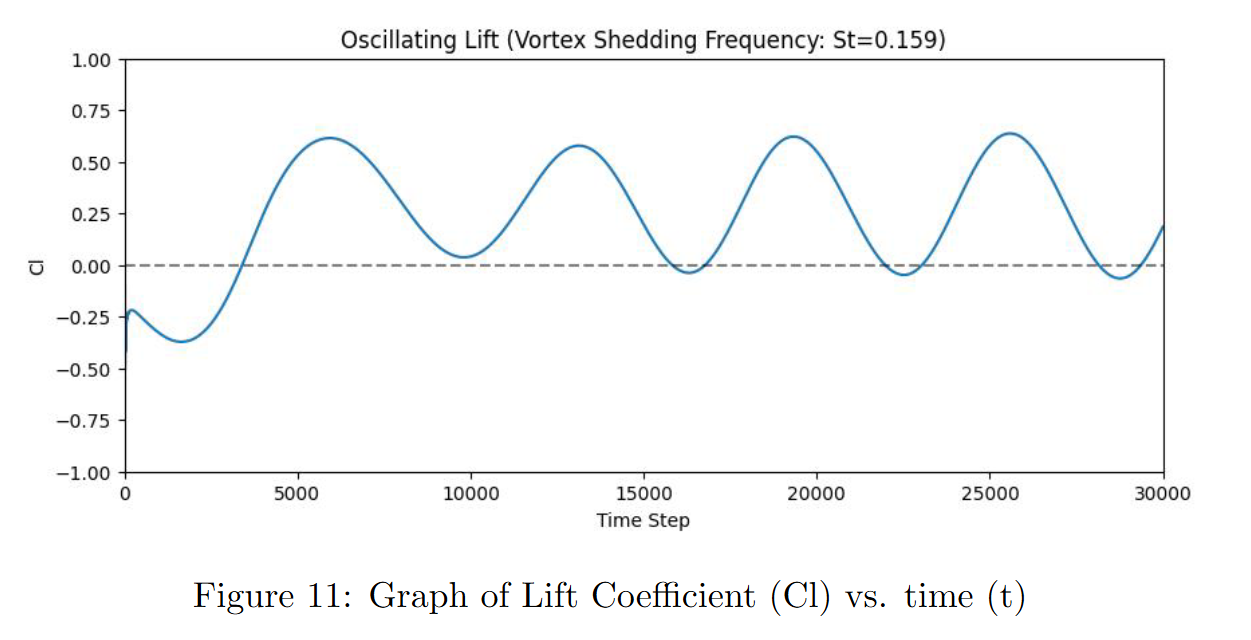


This frequency of oscillating lift coefficient $C_l$ is what we take as f. 


We use fast fourier transform to get this frequency from $C_l$ vs. $t$ graph.


Now, using empirical relation b/w $St$ and $Re$ , we get


\begin{equation*}
St = 0.2665 - \frac{1.018}{\sqrt{Re}}
\end{equation*}

This says that at $Re=200$,  we should have $St$ around 0.194 


But from fast fourier transform, we got $St = 0.159$, which corresponds to $Re$ value about $80$

Why? 

This is due to the truncation error caused by Upwind method for calculating Advection term. This truncation error creates "Ghost viscosity" or "Numerical Viscosity" (Unwanted), effectively lowering the effective Reynolds Number.

i.e. 

\begin{equation*}
    Re_{eff} = \frac{UD}{\nu \ + \ \nu_{\text{numerical}}}
\end{equation*}

as $U=1$, $D=1$

we get 

\begin{equation*}
    Re_{eff} = \frac{1}{\nu \ + \ \nu_{\text{numerical}}}
\end{equation*}

which beomes 

\begin{equation*}
    \frac{1}{Re_{eff}} = \frac{1}{Re}   + \nu_{\text{numerical}}
\end{equation*}





## Sources

[1] A Series in $1/\sqrt{Re}$ to Represent the Strouhal-Reynolds Number Relationship of the Cylinder Wake | Williamson, C. H. K. and Brown, G. L. | Journal of Fluids and Structures | 1998


[2] Numerical Simulation of Vortex Shedding Past a Circular Cylinder in a Cross-Flow at Low {Reynolds} Number With Finite Volume-Technique: Part 1 --- Forced Oscillations | Placzek, Antoine and Sigrist, Jean-Fran{\c{c}}ois and Hamdouni, Aziz | ASME 2007 Pressure Vessels and Piping Conference | 2007

[3] An Immersed-Boundary Finite-Volume Method for Simulations of Flow in Complex Geometries} | Kim, Jungwoo and Kim, Dongjoo and Choi, Haecheon | Journal of Computational Physics | 2001

[4] Numerical Calculation of Time-Dependent Viscous Incompressible Flow of Fluid with Free Surface} | Harlow, Francis H. and Welch, J. Eddie | Physics of Fluids | 1965

[5] [Flow Science, Inc. | What are Artificial and Numerical Viscosities?](https://www.flow3d.com/resources/cfd-101/numerical-issues/artificial-and-numerical-viscosities/)